In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, kurtosis
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
print(os.listdir('./stock'))

['news_sample.csv', 'marketdata_sample.csv']


In [4]:
df_train = pd.read_csv('./stock/marketdata_sample.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
time                        100 non-null object
assetCode                   100 non-null object
assetName                   100 non-null object
universe                    100 non-null float64
volume                      100 non-null float64
close                       100 non-null float64
open                        100 non-null float64
returnsClosePrevRaw1        100 non-null float64
returnsOpenPrevRaw1         100 non-null float64
returnsClosePrevMktres1     0 non-null float64
returnsOpenPrevMktres1      0 non-null float64
returnsClosePrevRaw10       100 non-null float64
returnsOpenPrevRaw10        100 non-null float64
returnsClosePrevMktres10    0 non-null float64
returnsOpenPrevMktres10     0 non-null float64
returnsOpenNextMktres10     100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


In [6]:
df_train.head(20)

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,1.0,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672
1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,0.0,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803
2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1.0,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433
3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,1.0,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425
4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1.0,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994
5,2007-02-01 22:00:00+00:00,ABC.N,AmerisourceBergen Corp,1.0,1657300.0,52.37,52.40,-0.000191,0.008468,NaN,NaN,0.089000,0.077746,NaN,NaN,0.058680
6,2007-02-01 22:00:00+00:00,ABD.N,ACCO Brands Corp,0.0,1186200.0,23.63,24.13,-0.020721,-0.007404,NaN,NaN,0.005104,0.026809,NaN,NaN,-0.044285
7,2007-02-01 22:00:00+00:00,ABM.N,ABM Industries Inc,0.0,301200.0,26.19,25.90,0.013545,0.014890,NaN,NaN,0.068980,0.047311,NaN,NaN,0.016578
8,2007-02-01 22:00:00+00:00,ABT.N,Abbott Laboratories,1.0,5692300.0,52.87,52.50,-0.002453,-0.004739,NaN,NaN,0.001515,-0.004928,NaN,NaN,0.009861
9,2007-02-01 22:00:00+00:00,ABV.N,Companhia de Bebidas das Americas Ambev,1.0,401800.0,52.46,52.10,0.014112,0.024784,NaN,NaN,0.042321,0.027411,NaN,NaN,0.012917


In [7]:

df_train.columns

Index(['time', 'assetCode', 'assetName', 'universe', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10'],
      dtype='object')

In [9]:
#check if there any zero in minimal of the price
df_train['close'].describe()

count    100.000000
mean      37.709300
std       22.929333
min        3.170000
25%       22.095000
50%       32.930000
75%       48.485000
max      118.210000
Name: close, dtype: float64

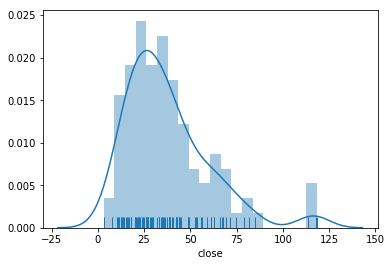

In [10]:
#https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions
sns.distplot(df_train['close'], bins=20, rug=True);

In [11]:
#Skew = ambience distributions data (0=evenly distributed)
#Kurt = to check the outlier data (3=standart value)
print("Skewness: %f" %df_train['close'].skew())
print("Kurtosis: %f" %df_train['close'].kurt())

Skewness: 1.422905
Kurtosis: 2.523948


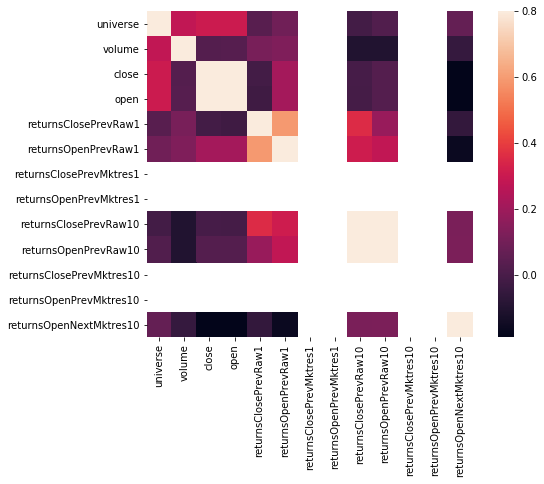

In [12]:
#Annotation Heatmap https://seaborn.pydata.org/examples/heatmap_annotation.html

Heatmap_Annotation = df_train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(Heatmap_Annotation, 
            vmax=.8, square=True)

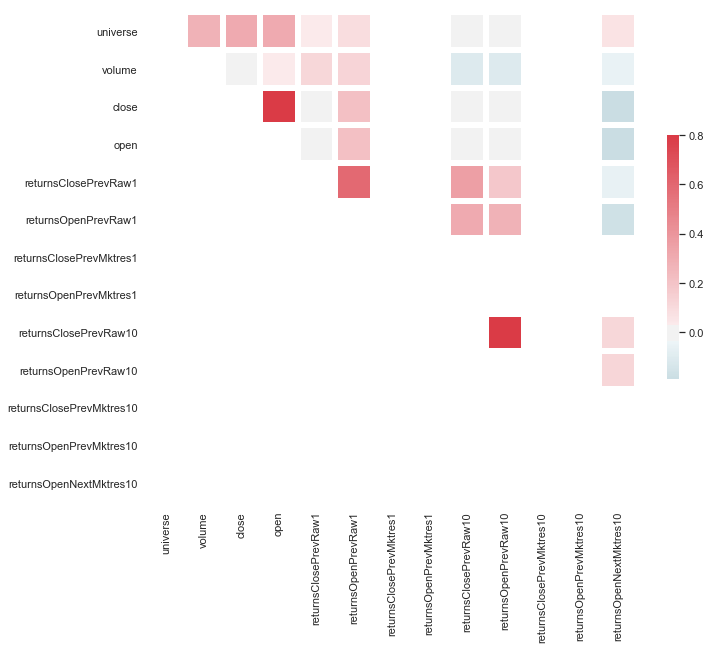

In [13]:
#Diagonal Correlation https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set(style='white')
Diagonal_Corr = df_train.corr()
mask = np.zeros_like(Diagonal_Corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Diagonal_Corr, mask=mask, cmap=cmap,
           vmax=.8, center=0,square=True,
           linewidths=5, cbar_kws={"shrink":.5})

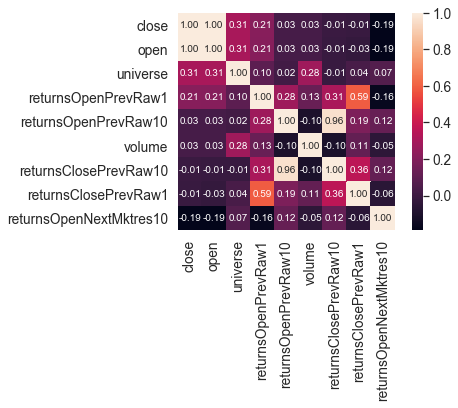

In [15]:
#SalePrice Correlation Matrix
k=10
sns.set(font_scale=1.25)
corrmat=df_train.corr()
cols = corrmat.nlargest(k, 'close')['close'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.heatmap(cm, annot=True, square=True,
           fmt='.2f', annot_kws={'size':10},
           yticklabels=cols.values,
           xticklabels=cols.values)



In [16]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = ((df_train.isnull().sum()/df_train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
returnsOpenPrevMktres10,100,100.0
returnsClosePrevMktres10,100,100.0
returnsOpenPrevMktres1,100,100.0
returnsClosePrevMktres1,100,100.0
returnsOpenNextMktres10,0,0.0
returnsOpenPrevRaw10,0,0.0
returnsClosePrevRaw10,0,0.0
returnsOpenPrevRaw1,0,0.0
returnsClosePrevRaw1,0,0.0
open,0,0.0


Text(0.5,1,'Percent missing data by feature')

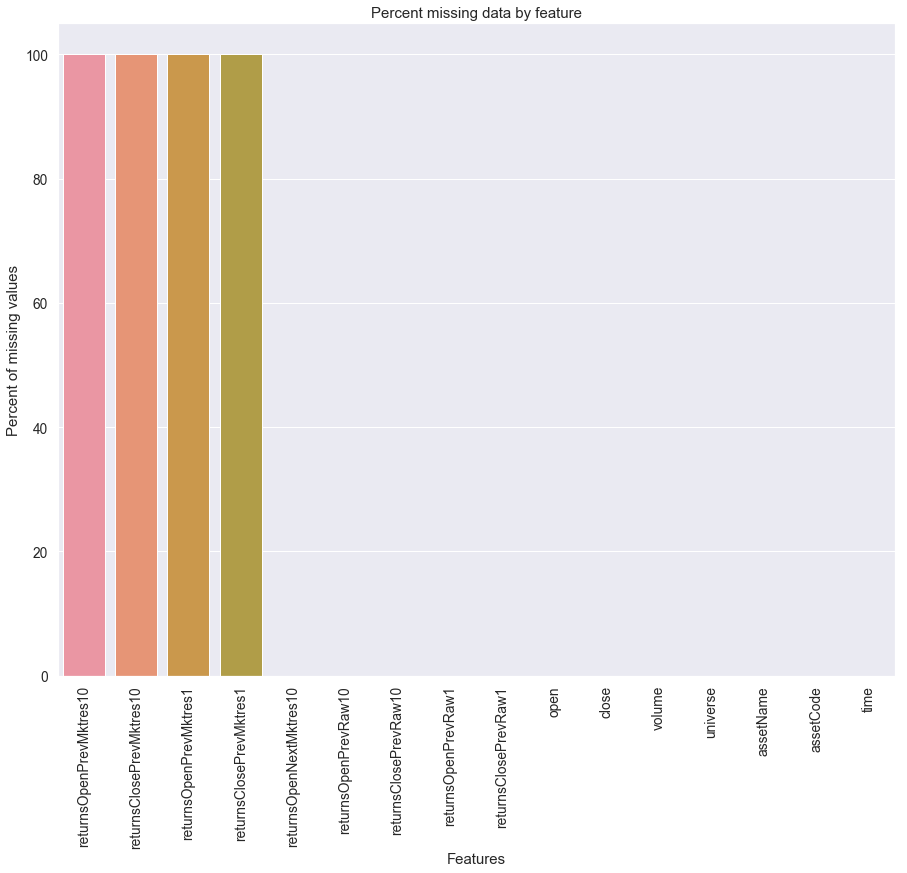

In [17]:
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=total.index, y=total)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values',fontsize=15)
plt.title('Percent missing data by feature',fontsize=15)

In [18]:
#drop columns/keys that have more than 50% of null values
df_train = df_train.drop((missing_data[missing_data['Percent'] > 50 ]).index,1)
df_train.isnull().sum().sort_values(ascending=False) #check

returnsOpenNextMktres10    0
returnsOpenPrevRaw10       0
returnsClosePrevRaw10      0
returnsOpenPrevRaw1        0
returnsClosePrevRaw1       0
open                       0
close                      0
volume                     0
universe                   0
assetName                  0
assetCode                  0
time                       0
dtype: int64

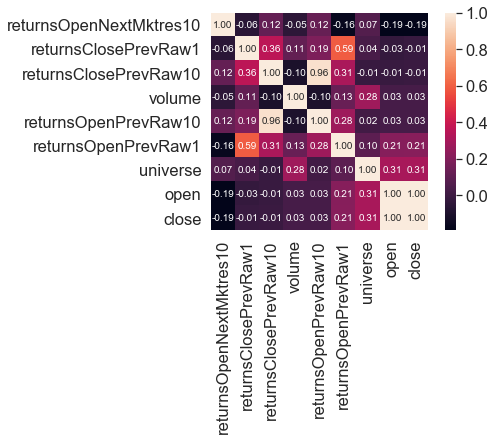

In [19]:
#SalePrice Correlation Matrix
k=10
sns.set(font_scale=1.5)
corrmat=df_train.corr()
cols = corrmat.nsmallest(k, 'close')['close'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.heatmap(cm, annot=True, square=True,
           fmt='.2f', annot_kws={'size':10},
           yticklabels=cols.values,
           xticklabels=cols.values)





In [20]:
#Univariate analysis
#Detect and exclude outlier in numeric dtype
#low 0.05 and high 0.90 quantile
from pandas.api.types import is_numeric_dtype
def remove_outlier(df_train):
    low = .05
    high = .90
    quant_df = df_train.quantile([low, high])
    for name in list(df_train.columns):
        if is_numeric_dtype(df_train[name]):
            df_train = df_train[(df_train[name] > quant_df.loc[low, name]) & (df_train[name] < quant_df.loc[high, name])]
    return df_train

remove_outlier(df_train).head()

,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsOpenNextMktres10


In [21]:
#check the standardizing data
for name in list(df_train.columns):
    if is_numeric_dtype(df_train[name]):
        saleprice_scaled = StandardScaler().fit_transform(df_train[name][:,np.newaxis]);
        low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:5]
        high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-5:]
        print('outer range (low) of the distribution:',name)
        print(low_range)
        print('\nouter range (high) of the distribution:',name)
        print(high_range)

outer range (low) of the distribution: universe
[[-1.45773797]
 [-1.45773797]
 [-1.45773797]
 [-1.45773797]
 [-1.45773797]]

outer range (high) of the distribution: universe
[[0.68599434]
 [0.68599434]
 [0.68599434]
 [0.68599434]
 [0.68599434]]
outer range (low) of the distribution: volume
[[-0.56002487]
 [-0.55463295]
 [-0.54944058]
 [-0.54668202]
 [-0.53394565]]

outer range (high) of the distribution: volume
[[3.45885481]
 [3.75982873]
 [4.00514886]
 [4.06294749]
 [4.5734551 ]]
outer range (low) of the distribution: close
[[-1.5139255 ]
 [-1.31361341]
 [-1.19745869]
 [-1.17817262]
 [-1.16546135]]

outer range (high) of the distribution: close
[[1.91987089]
 [2.06144815]
 [3.318549  ]
 [3.51097134]
 [3.52850413]]
outer range (low) of the distribution: open
[[-1.50497009]
 [-1.29942337]
 [-1.19467782]
 [-1.18196811]
 [-1.16093134]]

outer range (high) of the distribution: open
[[1.84294323]
 [2.132637  ]
 [3.34970144]
 [3.47066283]
 [3.51492769]]
outer range (low) of the distribution:

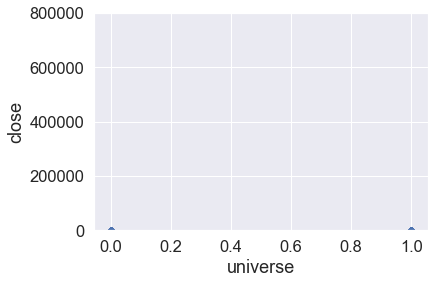

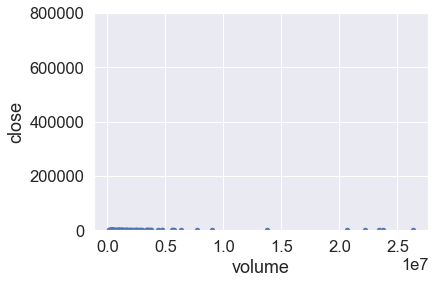

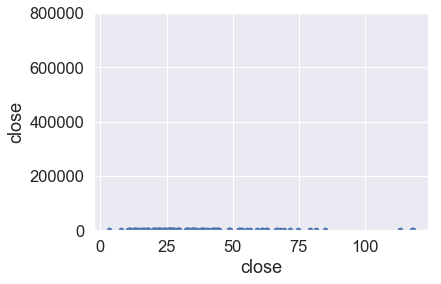

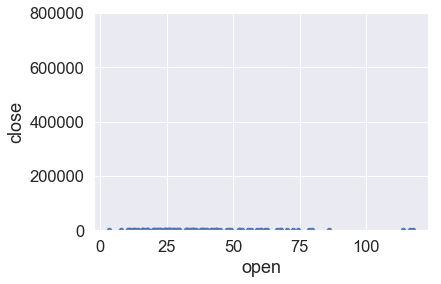

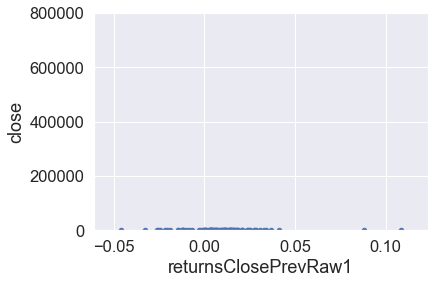

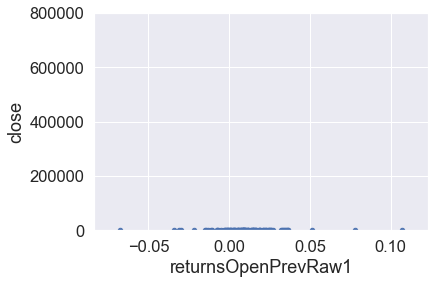

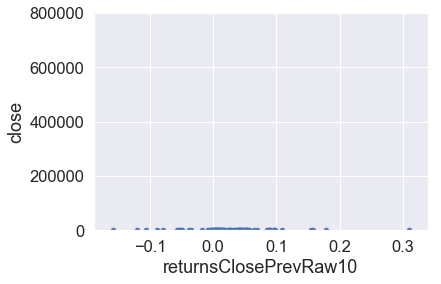

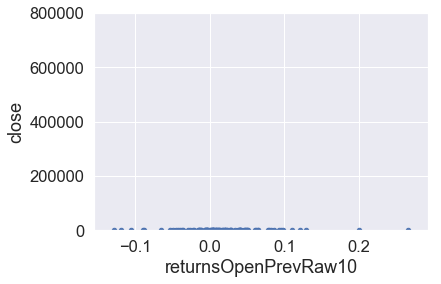

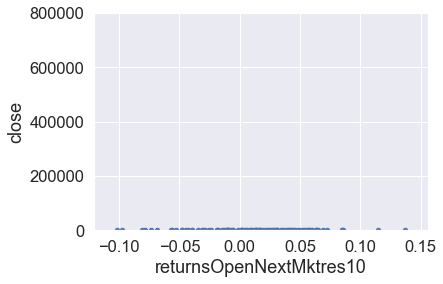

In [22]:
#Bivariate/Multivariate outlier checking with scatter plot
for name in list(df_train.columns):
    if is_numeric_dtype(df_train[name]):
        data = pd.concat([df_train['close'], df_train[name]], axis=1)
        data.plot.scatter(x=name, y='close', ylim=(0,800000))

In [23]:
#skewed features
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
volume,3.286868
returnsClosePrevRaw1,1.470514
close,1.401472
open,1.400594
returnsOpenPrevRaw10,0.900504
returnsClosePrevRaw10,0.797413
returnsOpenPrevRaw1,0.661318
returnsOpenNextMktres10,-0.162580
universe,-0.771744


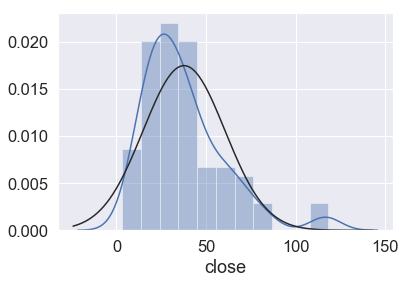

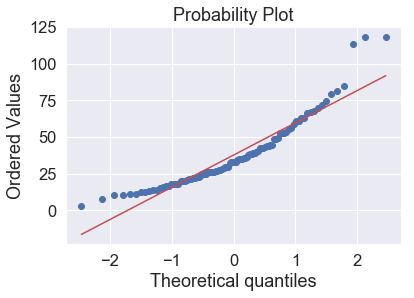

In [24]:
sns.distplot(df_train['close'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['close'], plot=plt)

In [25]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #df_train[feat] += 1
    df_train [feat] = boxcox1p(df_train[feat], lam)
    
#df_train[skewed_features] = np.log1p(df_train[skewed_features])

There are 9 skewed numerical features to Box Cox transform


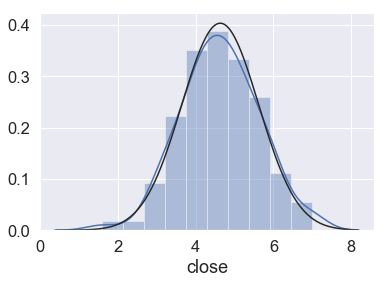

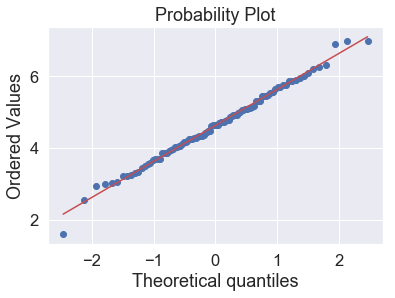

In [26]:
#check
sns.distplot(df_train['close'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['close'], plot=plt)

In [27]:
from sklearn.preprocessing import LabelEncoder
colomns = df_train.dtypes[df_train.dtypes == "object"].index
# process columns, apply LabelEncoder to categorical features
for name in colomns:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train[name].values)) 
    df_train[name] = lbl.transform(list(df_train[name].values))

# shape        
print('Shape of df_train: {}'.format(df_train.shape))

Shape of df_train: (100, 12)


In [28]:
#Dummy categorical features
df_train = pd.get_dummies(df_train)
print(df_train.shape)
df_train.head(20) #please compare the data after engineering and before engineering

(100, 12)


,time,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsOpenNextMktres10
0,0,0,28,0.730463,54.473613,4.606861,4.605842,0.005923,0.005301,-0.001862,0.000622,0.034172
1,0,1,31,0.000000,52.315765,3.025796,3.020991,0.004508,-0.007190,-0.081476,-0.091553,0.027480
2,0,2,18,0.730463,47.514269,4.861089,4.882529,-0.011652,0.025373,0.014246,0.044552,0.024183
3,0,3,74,0.730463,78.496335,6.331625,6.365260,-0.011605,0.016212,-0.049649,-0.037783,-0.007448
4,0,4,3,0.730463,47.815100,3.703609,3.702791,0.011732,0.024780,0.012858,0.020222,-0.018133
5,0,5,60,0.730463,50.457378,5.439407,5.440428,-0.000191,0.008438,0.085807,0.075294,0.057268
6,0,6,5,0.000000,47.662430,4.113573,4.146119,-0.020906,-0.007428,0.005093,0.026508,-0.045142
7,0,7,4,0.000000,37.565397,4.274663,4.257079,0.013468,0.014797,0.067039,0.046387,0.016462
8,0,8,10,0.730463,62.072129,5.456352,5.443826,-0.002455,-0.004749,0.001514,-0.004938,0.009820
9,0,9,93,0.730463,39.519338,5.442467,5.430201,0.014028,0.024527,0.041579,0.027097,0.012847
